In [12]:
import pandas as pd
import numpy as np
from numpy.random import seed

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
seed(100)

In [16]:
df = pd.read_csv("default_of_credit_card_client_processed.csv")
del df['Unnamed: 0']
del df['ID']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,b4,b5,ta0,ta1,ta2,ta3,ta4,ta5,SC,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,1,0,0,0,1,1,1,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
cols = np.transpose(df.columns.tolist())
cols

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC',
       'default payment next month'], dtype='<U26')

In [20]:
df[cols[35:41]].head()

,ta0,ta1,ta2,ta3,ta4,ta5
0,0,0,0,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [96]:
def ret_nd(dfx, cols, idx):
    x = dfx[cols[idx]].value_counts().sort_index(ascending=True).values[1]/len(dfx)
    return x

In [97]:
cols1 = np.arange(35, 41).tolist()
cols1

[35, 36, 37, 38, 39, 40]

In [98]:
idx_e = df["EDUCATION"].value_counts().sort_values(ascending=False).index.tolist()[0:3]
idx_e

[2, 1, 3]

In [99]:
df[df["EDUCATION"]==1][cols[36]].value_counts()/len(df)

0    0.251733
1    0.096931
Name: ta1, dtype: float64

In [100]:
df[df["EDUCATION"]==1][cols[41]].value_counts()/len(df)

0    0.345198
1    0.003467
Name: SC, dtype: float64

In [101]:
xr = []
for i in idx_e:
    dfx = df[df["EDUCATION"]==i]
    for idx in cols1: 
        xr.append(ret_nd(dfx, cols, idx))

In [102]:
xr

[0.1176556243174372,
 0.1560247542773935,
 0.1641062977793957,
 0.17451765562431742,
 0.19446669093556607,
 0.2168183472879505,
 0.1993502658003544,
 0.2780074817877535,
 0.2710179169127781,
 0.27170702894270526,
 0.2916912778105926,
 0.30891907855877143,
 0.11389759665621735,
 0.1554858934169279,
 0.1657262277951933,
 0.17847439916405433,
 0.19373040752351098,
 0.22027168234064787]

In [103]:
xr1 = np.reshape(xr, (3,6))
xr1

array([[0.11765562, 0.15602475, 0.1641063 , 0.17451766, 0.19446669,
        0.21681835],
       [0.19935027, 0.27800748, 0.27101792, 0.27170703, 0.29169128,
        0.30891908],
       [0.1138976 , 0.15548589, 0.16572623, 0.1784744 , 0.19373041,
        0.22027168]])

In [104]:
xr1[0]

array([0.11765562, 0.15602475, 0.1641063 , 0.17451766, 0.19446669,
       0.21681835])

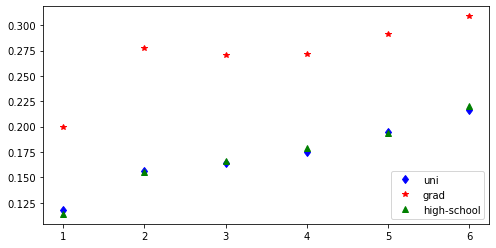

In [126]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1,7), xr1[0], 'b d', label="uni")
plt.plot(np.arange(1,7), xr1[1], 'r *', label="grad")
plt.plot(np.arange(1,7), xr1[2], 'g ^', label="high-school")
plt.legend()
plt.show()